In [1]:
%matplotlib inline

import datetime as dt
import os
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

os.getcwd()

'/home/edmz/data-Covid/Code'

In [2]:
import my_package.v4_dicts as dc
import my_package.v4_datepaths as dp
import my_package.v4_graph_functions as gf

from my_package.v4_graph_options import graph_options

Today is 13/04/2021. Retrieve data from how many days? 
Ok, will retrieve data from 12/04/2021


# Fusion SIDEP et données hospitalières

In [3]:
fname = dp.retrieve_temp('vacsi-a-dep', 'tot-3C-compute')
dvac = pd.read_csv(fname, sep = ';', 
                parse_dates = ['jour'],
                dtype = {'entity': str},
               )
fname = dp.retrieve_temp('donnees-hospitalieres-classe-age-covid19', '3C-compute')
dhos = pd.read_csv(fname, sep = ';', 
                parse_dates = ['jour'],
                dtype = {'entity': str},
               )
fname = dp.retrieve_temp('sp-pos-quot-dep', 'tot-3C-compute')
dtes = pd.read_csv(fname, sep = ';', 
                parse_dates = ['jour'],
                dtype = {'entity': str},
               )
d = pd.merge(dtes, dhos, how = 'outer')
d = pd.merge(d, dvac, how = 'outer')
d = d.sort_values(['entity', 'three_class', 'jour'])

../Temp/v4/vacsi-a-dep-2021-04-12-18h47-tot-3C-compute.csv
../Temp/v4/donnees-hospitalieres-classe-age-covid19-2021-04-12-18h07-3C-compute.csv
../Temp/v4/sp-pos-quot-dep-2021-04-12-18h12-tot-3C-compute.csv


In [4]:
print(d.shape)
d.sample(10)

(158396, 24)


,entity,three_class,jour,P,T,pop,P hebdo,T hebdo,incidence hebdo,taux de positifs hebdo,...,dc hebdo,taux hosp,taux rea,taux décès,n_dose1,n_dose2,n_cum_dose1,n_cum_dose2,taux dose 1,taux dose 2
152976,Île-de-France,0-29,2020-07-16,98.0,6036.0,4792882.0,382.0,27089.0,7.970152,1.410166,...,0.0,1.606549,0.250371,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
16448,13,0-29,2020-09-18,293.0,4461.0,710300.0,1770.0,26319.0,249.190483,6.725180,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45925,34,30-59,2020-11-22,9.0,138.0,435285.0,569.0,10792.0,130.718954,5.272424,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7189,06,30-59,2020-09-27,3.0,118.0,409246.0,457.0,8388.0,111.668776,5.448259,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32775,26,whole,2020-12-24,139.0,4502.0,520560.0,1229.0,40037.0,236.091901,3.069661,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
143014,Grand Est,60+,2020-12-28,950.0,10986.0,1512834.0,3345.0,59864.0,221.108198,5.587665,...,270.0,174.176413,15.004951,17.847299,0.0,0.0,0.0,0.0,0.0,0.0
144868,Normandie,0-29,2020-06-11,6.0,275.0,1123266.0,17.0,1832.0,1.513444,0.927948,...,0.0,0.089026,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
13335,11,whole,2020-05-26,0.0,248.0,372705.0,14.0,1645.0,3.756322,0.851064,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60235,45,whole,2020-09-08,86.0,2614.0,682890.0,564.0,14286.0,82.590168,3.947921,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
145617,Normandie,30-59,2020-12-15,220.0,5988.0,1228078.0,1259.0,27189.0,102.517918,4.630549,...,3.0,8.224233,1.302849,0.244284,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
plt.rcParams['figure.facecolor'] = (1,1,1,1)

In [6]:
plt.rcParams['figure.facecolor']

(1, 1, 1, 1)

# Graphes 1_indic_all_reg

In [7]:
regions = dc.regs
last_week = ((d.jour > np.datetime64(dt.datetime.fromisoformat(dp.DATE_CHOICE[0]) - dt.timedelta(weeks = 1))) 
             & (d.jour <= np.datetime64(dt.datetime.fromisoformat(dp.DATE_CHOICE[0]))))

In [8]:
# for column_to_plot in graph_options:
#     regions_ordered = (d[(last_week) 
#                     & (d.entity.isin(regions))
#                     & (d.three_class == '60+')]
#                    .groupby('entity')[column_to_plot]
#                    .mean()
#                    .sort_values(ascending = False)
#                    .index
#                    .tolist())
#     gf.fig_1_indic_all_reg(d, column_to_plot, regions_ordered + ['Outre-mer (DROM)'])

In [9]:
# regions_ordered = (d[(last_week) 
#                     & (d.entity.isin(regions))
#                     & (d.three_class == '60+')]
#                    .groupby('entity')['taux hosp']
#                    .mean()
#                    .sort_values(ascending = False)
#                    .index
#                    .tolist())
# gf.fig_n_indic_n_reg(d, regions_ordered[:4], regions_ordered, '1 sur 3')
# gf.fig_n_indic_n_reg(d, regions_ordered[4:8], regions_ordered, '2 sur 3')
# gf.fig_n_indic_n_reg(d, regions_ordered[8:], regions_ordered, '3 sur 3')
# gf.fig_n_indic_n_reg(d, regions_ordered, regions_ordered, 'toutes régions')

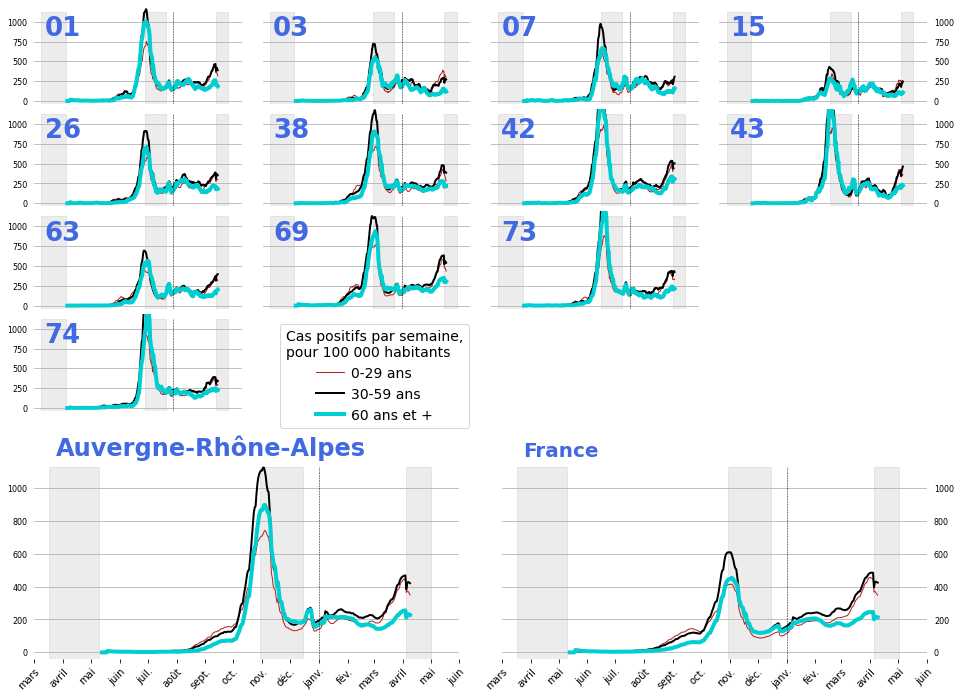

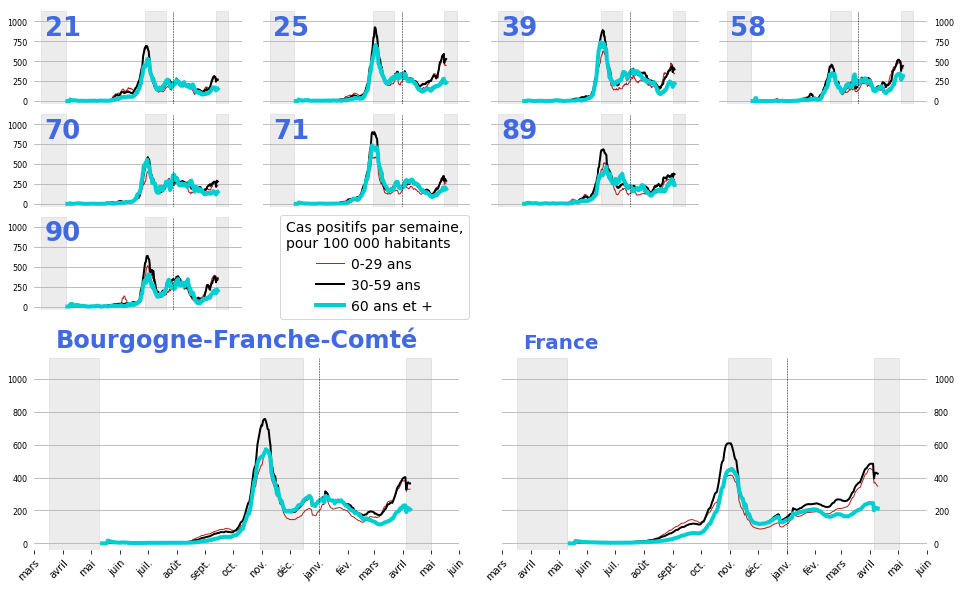

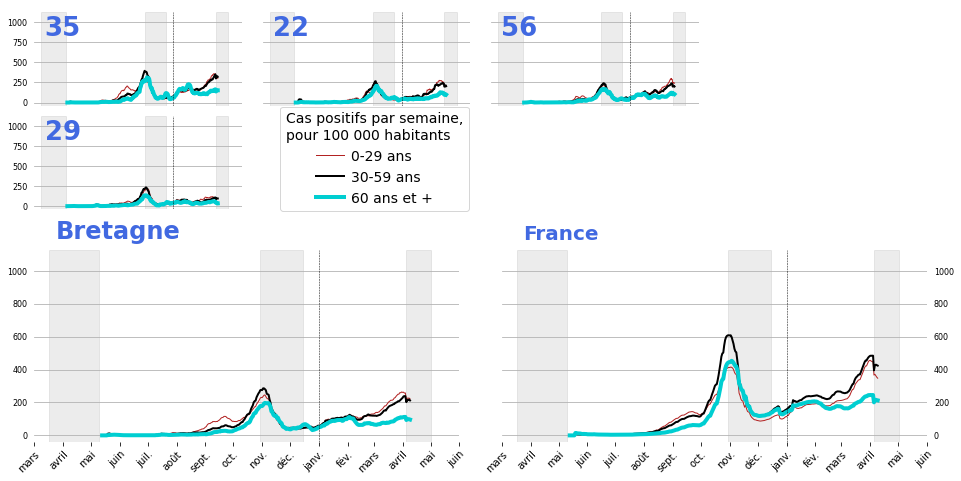

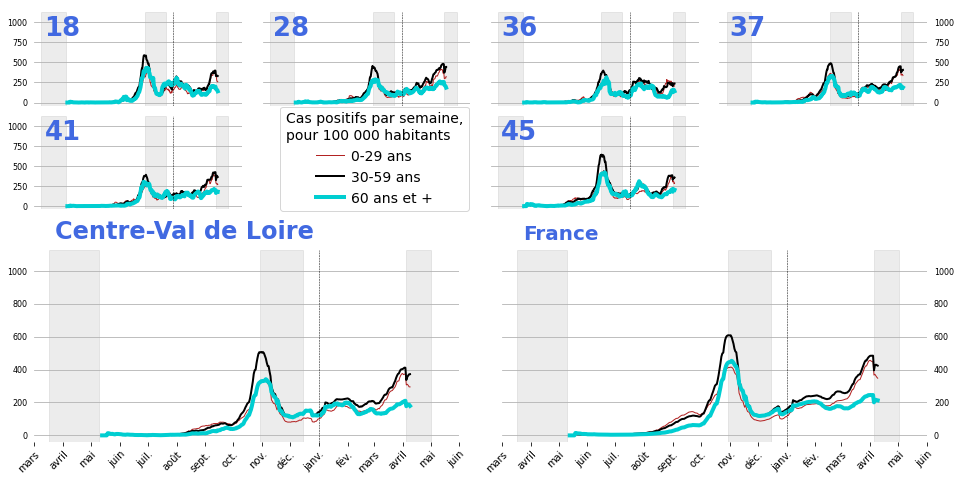

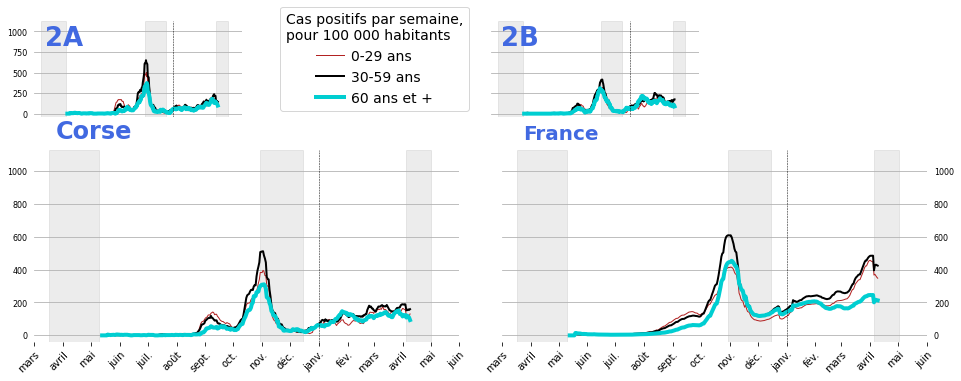

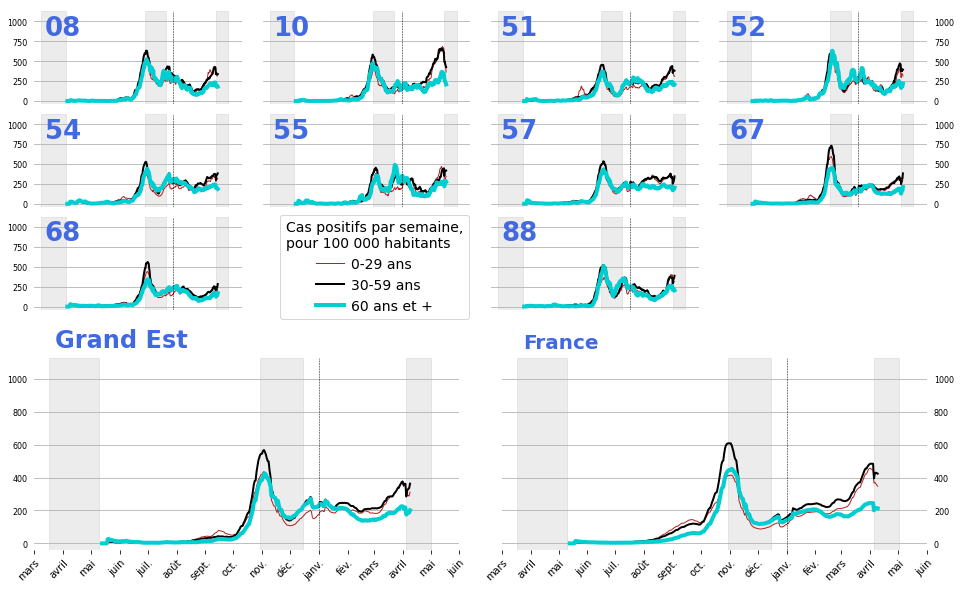

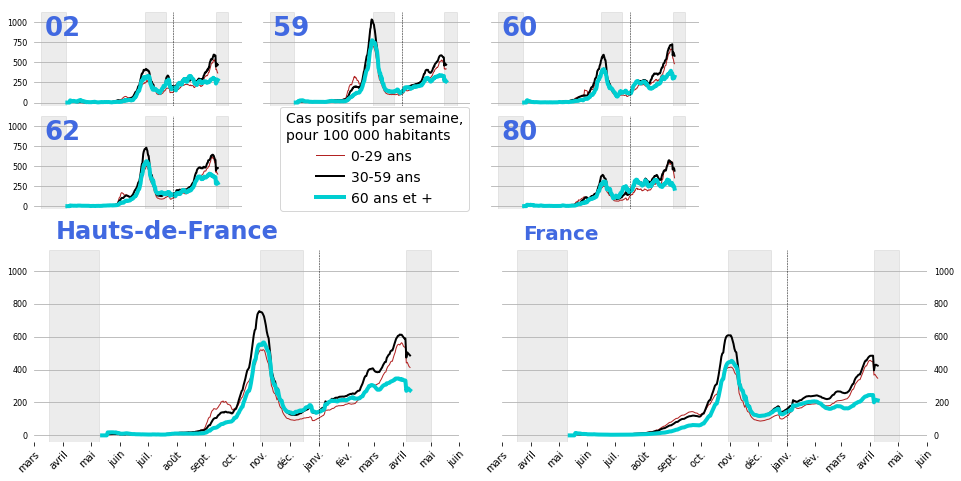

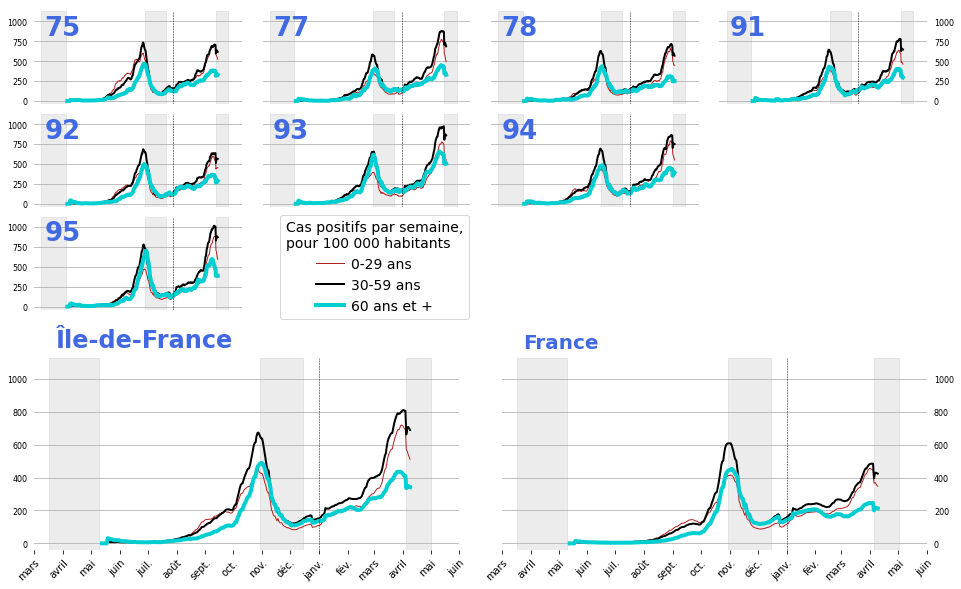

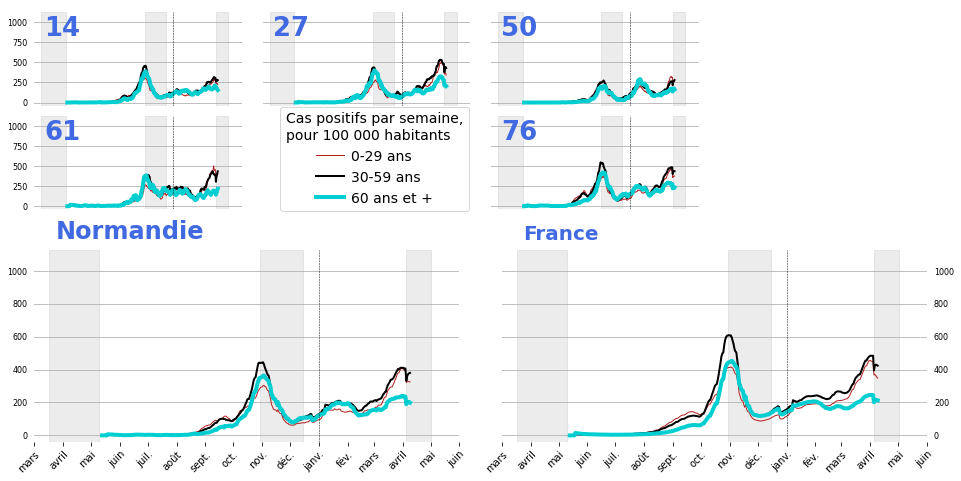

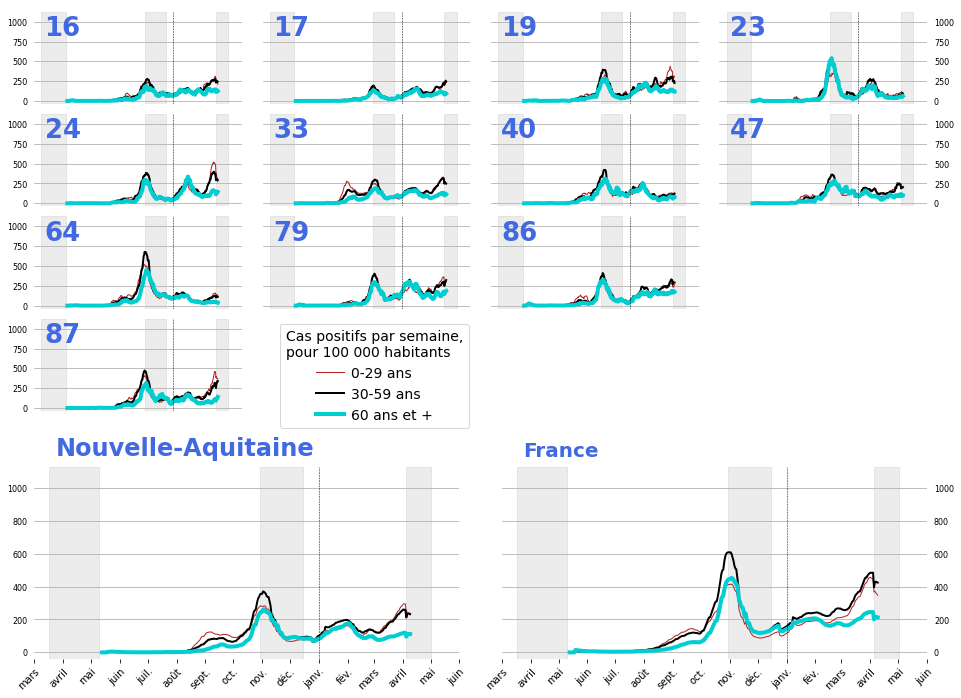

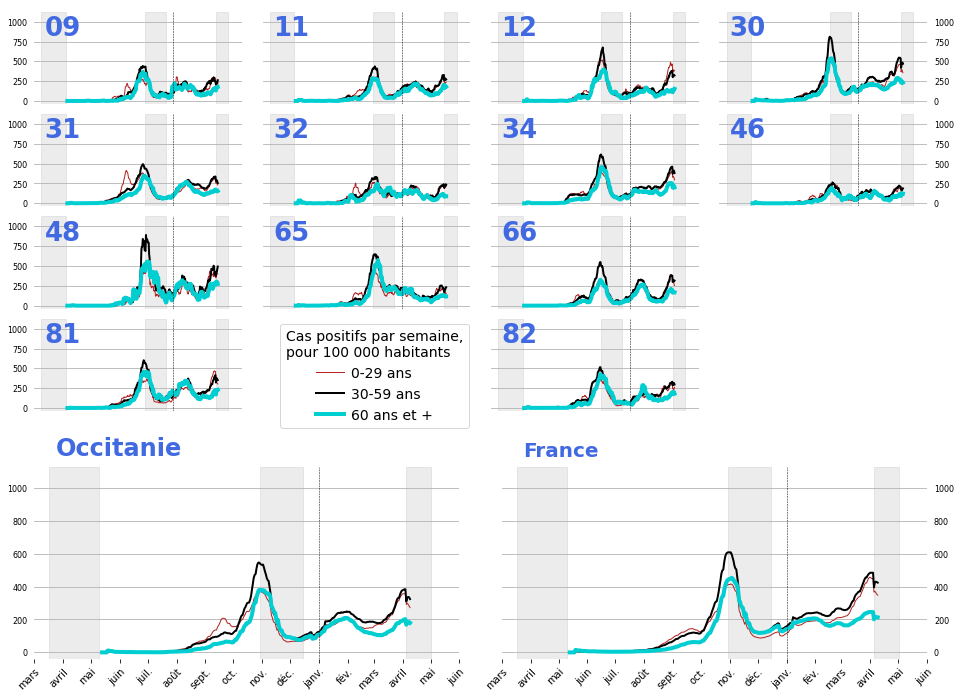

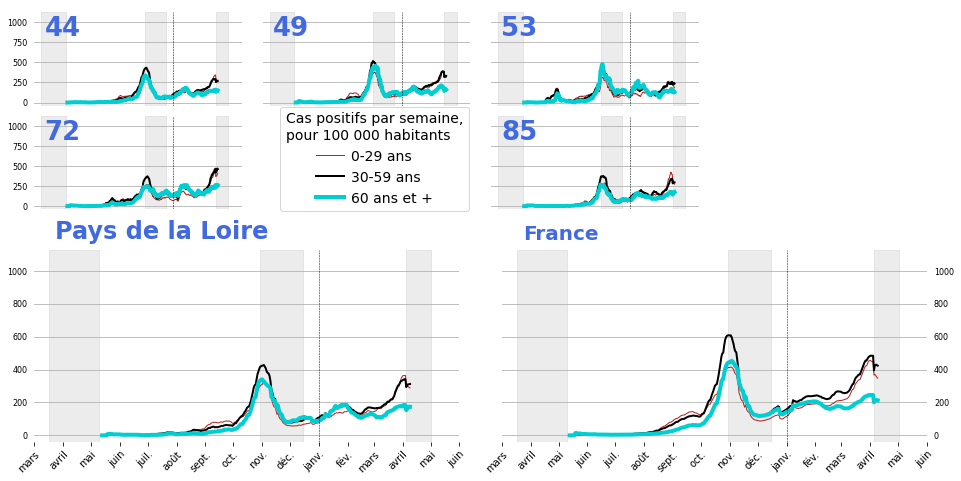

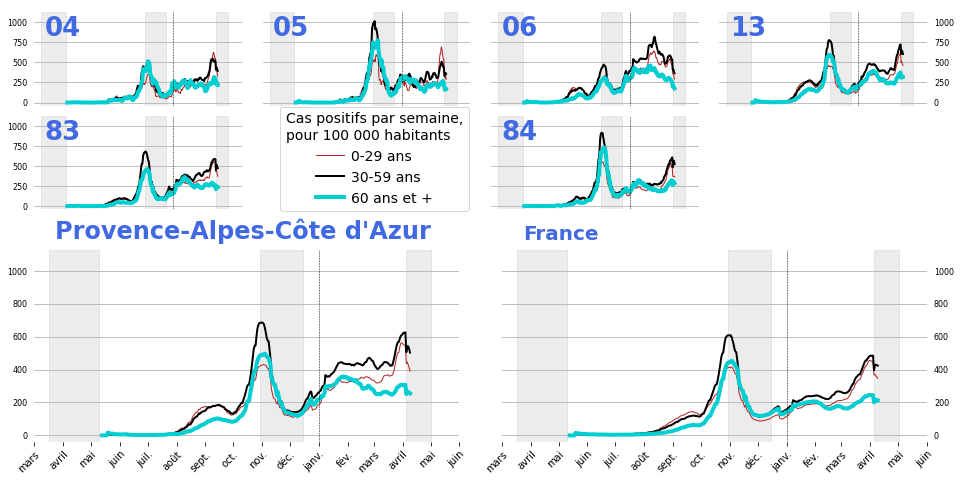

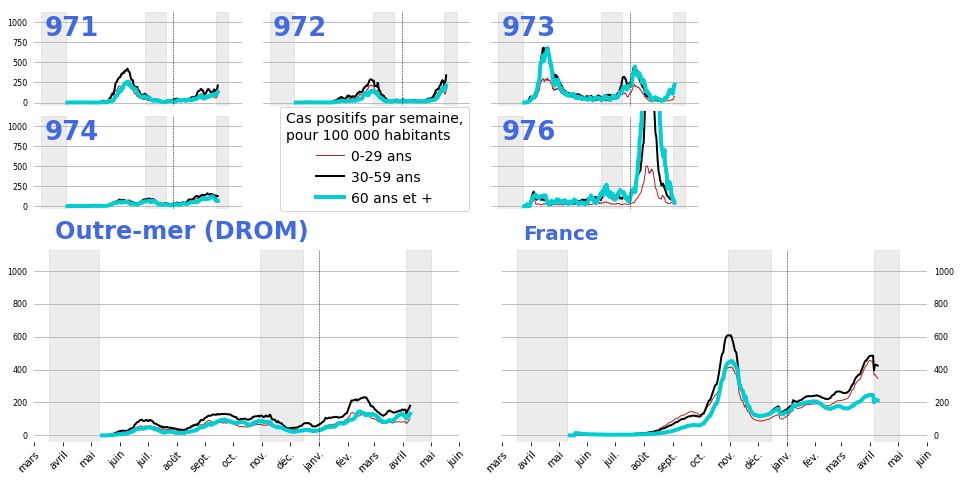

In [10]:
for region in regions:
    gf.fig_1_indic_1_region(d, region, "incidence hebdo")

NameError: name 'deps' is not defined

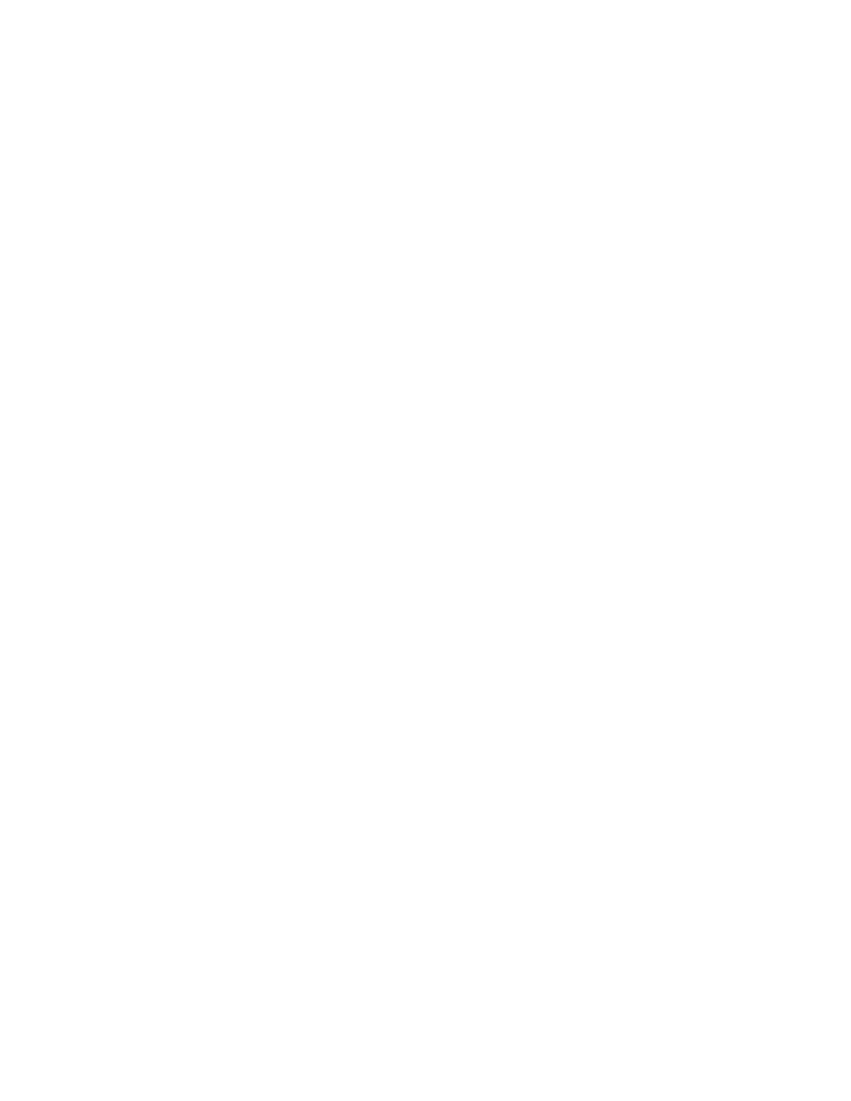

In [11]:
fig, axs = plt.subplots(11, 10, figsize = (15,20))
axs = axs.ravel()
for ax in axs:
    ax.set_axis_off()
for i, dep in enumerate(deps):
    sns.set_palette("mako",2)
    
    dplot = d.loc[d.dep == dep].loc[d.cl_age90 == 19]
    axs[i].plot(dplot.jour, dplot["incidence hebdo"], c = "darkturquoise", linewidth = 4)
    
    dplot = d.loc[d.dep == dep].loc[d.cl_age90 == 0]
    axs[i].plot(dplot.jour, dplot["incidence hebdo"], c = "black")
    
    dplot = d.loc[d.dep == dep].loc[d.cl_age90 == 89]
    #axs[i].plot(dplot.jour, dplot["incidence hebdo"], c = 'blue')
    axs[i].set_ylim(-500,1500)
    axs[i].set_axis_off()
    axs[i].set_title(dep, loc = 'left', y = 0.7, fontsize = 22, c = "darkturquoise")
    axs[i].set_title(dep_name[dep], x = -0.05, y = 0.2, rotation = 90, fontsize = 7)
fig.savefig("fig2.svg", pad_inches = 0)

In [ ]:
produce_fig_dep(d, deps)

In [ ]:
produce_fig_dep(d, reg2dep['Île-de-France'])

In [ ]:
for reg in regs:
    print(reg)
    produce_fig_dep(d, reg2dep[reg])